In [1]:
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

<h1>Loading the Data and Preparing it</h1>
<p>Load the data set present in csv format. The dataset consists of two columns - 
<ul>
    <li><i>Review</i> - Review of the user</li>
    <li><i>Rating</i> - Rating of the user out of 5</li>
</ul>
</p>

In [2]:
data = pd.read_csv("tripadvisor_hotel_reviews.csv")
data.head(5)

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [3]:
data.isna().sum()

Review    0
Rating    0
dtype: int64

<h1>Exploratory Analysis</h1>
<p>Conduct visualization of the dataset. Generate sentiment of each review and add it to the dataset.
</p>

<h3>Sentiment Analylsis of each Review</h3>

In [4]:
sentiments = []
for review in data['Review']:
    if TextBlob(review).sentiment.polarity < 0:
        sentiments.append("Negative")
    if TextBlob(review).sentiment.polarity == 0:
        sentiments.append("Neutral")
    if TextBlob(review).sentiment.polarity > 0:
        sentiments.append("Positive")
data["Sentiment"] = np.array(sentiments)

In [5]:
del sentiments

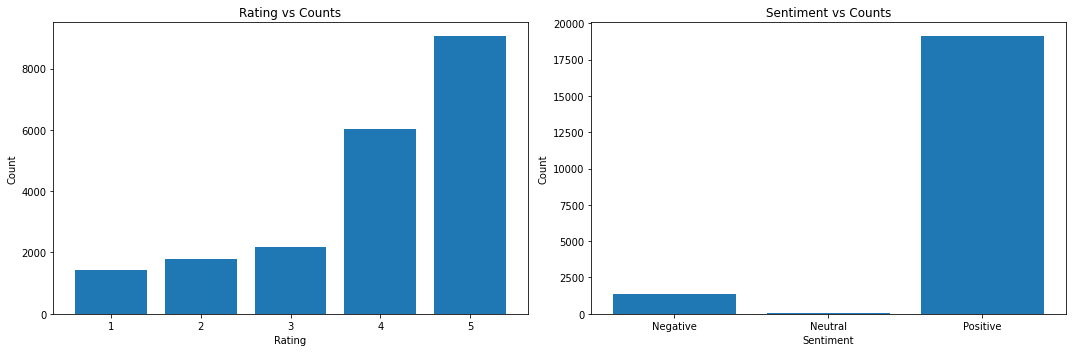

In [6]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
x_axis,counts = np.unique(data['Rating'],return_counts=True)
plt.bar([str(i) for i in x_axis],counts)
plt.title("Rating vs Counts")
plt.xlabel("Rating")
plt.ylabel("Count")

plt.subplot(1,2,2)
x_axis,counts = np.unique(data['Sentiment'],return_counts=True)
plt.bar(x_axis,counts)
plt.title("Sentiment vs Counts")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.tight_layout()

<p>Majority of the reviews are 4 and 5 and denotes a high number of positive reviews in comparison with negative and neutral reviews</p>

<h1>Natural Language Processing</h1>
<p>Using TextBlob, we will try to predict what approximate rating each review can get, consdiering the rating is dependent only on the content of the review and is not subject to any bias. We will use the Naive Bayes Classifier from TextBlob to build a text classification system.</p>

In [7]:
vectorizer = TfidfVectorizer(stop_words=text.ENGLISH_STOP_WORDS)
X_train,X_test,Y_train,Y_test = train_test_split(vectorizer.fit_transform(data['Review']).toarray(),
                                                 data['Rating'].values,
                                                 test_size = 0.2,
                                                 random_state=42)

In [8]:
print("Train Features : ",X_train.shape)
print("Train Labels   : ",Y_train.shape)
print("Test Features  : ",X_test.shape)
print("Test Labels    : ",Y_test.shape)

Train Features :  (16392, 52650)
Train Labels   :  (16392,)
Test Features  :  (4099, 52650)
Test Labels    :  (4099,)


LOGISTIC REGRESSION

In [9]:
clf = LogisticRegression(solver='liblinear',random_state=0)
clf.fit(X_train,Y_train)
print("Train Accuracy : {:.2f} %".format(accuracy_score(clf.predict(X_train),Y_train)*100))
print("Test Accuracy  : {:.2f} %".format(accuracy_score(clf.predict(X_test),Y_test)*100))

Train Accuracy : 76.15 %
Test Accuracy  : 62.11 %


DECISION TREE

In [ ]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train,Y_train)
print("Train Accuracy : {:.2f} %".format(accuracy_score(clf.predict(X_train),Y_train)*100))
print("Test Accuracy  : {:.2f} %".format(accuracy_score(clf.predict(X_test),Y_test)*100))

RANDOM FOREST

In [11]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,Y_train)
print("Train Accuracy : {:.2f} %".format(accuracy_score(clf.predict(X_train),Y_train)*100))
print("Test Accuracy  : {:.2f} %".format(accuracy_score(clf.predict(X_test),Y_test)*100))

Train Accuracy : 100.00 %
Test Accuracy  : 51.92 %


SubGrouping of guven groups

In [12]:
groups = []
for rating in data['Rating']:
    if rating in [1,2,3]:
        groups.append(0)
    else:
        groups.append(1)
data['Group'] = groups

In [13]:
data

,Review,Rating,Sentiment,Group
0,nice hotel expensive parking got good deal sta...,4,Positive,1
1,ok nothing special charge diamond member hilto...,2,Positive,0
2,nice rooms not 4* experience hotel monaco seat...,3,Positive,0
3,"unique, great stay, wonderful time hotel monac...",5,Positive,1
4,"great stay great stay, went seahawk game aweso...",5,Positive,1
...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,Positive,1
20487,great location price view hotel great quick pl...,4,Positive,1
20488,"ok just looks nice modern outside, desk staff ...",2,Positive,0
20489,hotel theft ruined vacation hotel opened sept ...,1,Positive,0


<p>Let us perform the train test split again, but this time with Group as the target.</p>

In [14]:
vectorizer = TfidfVectorizer(stop_words=text.ENGLISH_STOP_WORDS)
X_train,X_test,Y_train,Y_test = train_test_split(vectorizer.fit_transform(data['Review']).toarray(),
                                                 data['Group'].values,
                                                 test_size = 0.2,
                                                 random_state=42)

In [15]:
clf = LogisticRegression(solver='liblinear',random_state=0)
clf.fit(X_train,Y_train)
print("Train Accuracy : {:.2f} %".format(accuracy_score(clf.predict(X_train),Y_train)*100))
print("Test Accuracy  : {:.2f} %".format(accuracy_score(clf.predict(X_test),Y_test)*100))

Train Accuracy : 93.08 %
Test Accuracy  : 90.07 %


<p>As seen above, Simple Logistic Regression itself achieves a good performance with using Group as a feature compare to using Rating as a feature.</p>